In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

In [2]:
# File downloaded from https://lambda.gsfc.nasa.gov/product/foreground/fg_ovrolwa_radio_maps_get.html
filepath = "/Users/ruby/Astro/mmode_maps_eastwood/ovro_lwa_sky_map_73.152MHz.fits"

In [3]:
file_contents = fits.open(filepath)

In [4]:
file_contents[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATE    = '2017-09-22T20:32:50' / file creation date (YYYY-MM-DDThh:mm:ss UT)   

In [5]:
file_contents[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                    8 / width of table in bytes                        
NAXIS2  =             50331648 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    1 / number of fields in each row                   
TTYPE1  = 'SIGNAL  '           / label for field   1                            
TFORM1  = '1D      '           / data format of field: 8-byte DOUBLE            
EXTNAME = 'BINTABLE'           / name of this binary table extension            
PIXTYPE = 'HEALPIX '           / HEALPIX pixelization                           
ORDERING= 'RING    '        

In [6]:
map_data = np.array(file_contents[1].data, dtype=float)

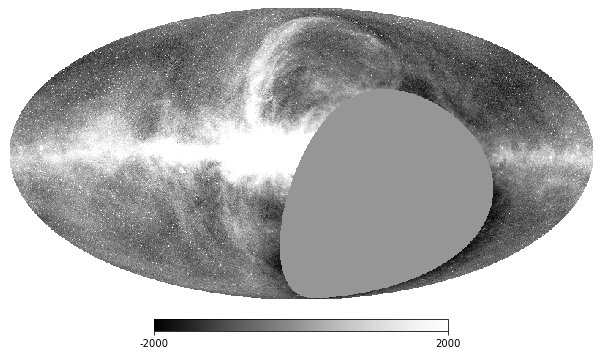

In [7]:
# Plot map in Galactic coordinates
proj = hp.mollview(
    map=map_data,
    coord=file_contents[1].header["COORDSYS"],
    nest=False,
    title="",
    min=-2000,
    max=2000,
    cbar=True,
    cmap='Greys_r',
    return_projected_map=False,
    notext=True,
    unit=None
)
plt.show()

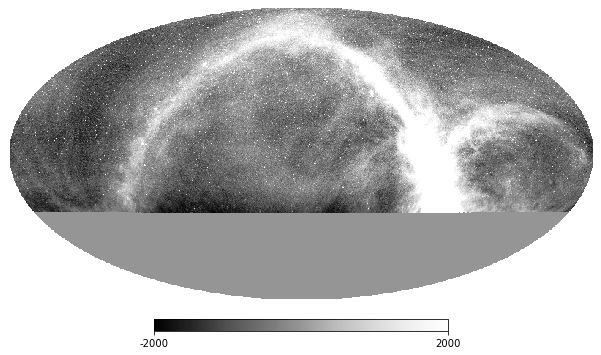

In [8]:
# Plot map in Equitorial coordinates
proj = hp.mollview(
    map=map_data,
    coord=[
        file_contents[1].header["COORDSYS"],
        "C"
    ],
    nest=False,
    title="",
    min=-2000,
    max=2000,
    cbar=True,
    cmap='Greys_r',
    return_projected_map=False,
    notext=True,
    unit=None
)
plt.show()

In [9]:
# Get coordinates of each pixel
nside = file_contents[1].header["NSIDE"]
npix = hp.nside2npix(nside)
theta_gal, phi_gal = hp.pixelfunc.pix2ang(
    nside,
    np.arange(npix),
    nest=False
)
rot = hp.rotator.Rotator(coord=['G', 'C'])
theta_eq, phi_eq = rot(theta_gal, phi_gal)
ra_arr = np.degrees(phi_eq)  # RA values in degrees
ra_arr[np.where(ra_arr < 0)] += 360.  # Make all RA values positive
dec_arr = 90. - np.degrees(theta_eq)  # Dec values in degrees